<a href="https://colab.research.google.com/github/TAEWOOYOON/SkillTreePython-DeepLearning/blob/main/04.Paper-with-code/ch04_03_Generative_Model_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.03 Generative Model - DCGAN

* 날짜: 2022.08.09
* 이름: 윤태우

## 학습내용
    - 딥러닝 생성모델에 대해 이해한다.
    - Deep Convolutional Generative Adversarial Networks 를 구현한다.

> https://arxiv.org/pdf/1406.2661.pdf



## 실습
---

### | **모델 구현**
<p  align='center'>
<img src ='https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0403-02.PNG?raw=true' width=800>
</p>

In [ ]:
# Generator

import tensorflow as tf
from tensorflow.keras import models, layers, utils
def build_generator(z_dim = 64, img_shape = (28,28,1)) :
  h,w,c = img_shape
  z = layers.Input(shape = [z_dim]) # 길이가 z_dim인 벡터
  y = layers.Dense(int(w/4)*int(h/4)*8, activation = 'relu')(z)
  y = layers.Reshape([int(w/4),int(h/4),8])(y)

  y = layers.BatchNormalization()(y)
  y = layers.Conv2DTranspose(16,kernel_size = 3, padding = 'same', strides = 2, activation = 'relu')(y)
  y = layers.BatchNormalization()(y)

  # 크기가 img_shape = (h,w,c)인 텐서
  y = layers.Conv2DTranspose(c,kernel_size = 3, padding = 'same', strides = 2, activation = 'sigmoid')(y)
  return models.Model(z, y, name = 'Generator')

g = build_generator()
g.summary()

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_7 (Dense)             (None, 392)               25480     
                                                                 
 reshape_7 (Reshape)         (None, 7, 7, 8)           0         
                                                                 
 batch_normalization_2 (Batc  (None, 7, 7, 8)          32        
 hNormalization)                                                 
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 14, 14, 16)       1168      
 Transpose)                                                      
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 16)       64

In [ ]:
# Discriminator

def build_disc(img_shape = (28,28,1)) :
  x = layers.Input(shape = img_shape)
  y = layers.Conv2D(16,kernel_size = 3, strides = 2, padding = 'same', activation = 'relu')(x)
  y = layers.Dropout(.5)(y)
  y = layers.Conv2D(32,kernel_size = 3, strides = 2, padding = 'same', activation = 'relu')(y)
  y = layers.Dropout(.5)(y)
  y = layers.Flatten()(y)
  y = layers.Dense(128, activation = 'sigmoid')(y)
  y = layers.Dropout(.5)(y)
  y = layers.Dense(1, activation = 'sigmoid')(y)
  return models.Model(x, y, name = 'Discriminator')

d = build_disc()
d.summary()

Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense_8 (Dense)             (None, 128)             

In [ ]:
# GAN

def build_gan(z_dim, img_shape) :
  generator = build_generator(z_dim, img_shape)
  discriminator = build_disc(img_shape)
  z = layers.Input(shape = [z_dim])
  fake_img = generator(z)
  logit = discriminator(fake_img)
  return models.Model(z, logit, name = 'GAN')

gan = build_gan(128,(32,32,3))
gan.summary()

Model: "GAN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 128)]             0         
                                                                 
 Generator (Functional)      (None, 32, 32, 3)         67747     
                                                                 
 Discriminator (Functional)  (None, 1)                 267489    
                                                                 
Total params: 335,236
Trainable params: 335,188
Non-trainable params: 48
_________________________________________________________________


(1, 64) (1, 28, 28, 1)


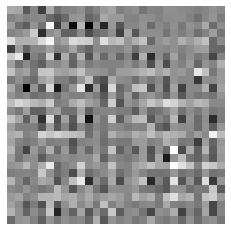

[[0.3562515]]


In [ ]:
import matplotlib.pyplot as plt
z = tf.random.normal([1,64])
fake_img = g.predict(z)
print(z.shape, fake_img.shape)
plt.imshow(fake_img[0,:,:,0], cmap = 'gray')
plt.axis('off')
plt.show()
logit = d.predict(fake_img)
print(logit)

### **| 학습**
<p  align='center'>
<img src ='https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0403-01.PNG?raw=true' width=600>
</p>